In [1]:
import xml.etree.ElementTree as ET
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from glob import glob
from xml import etree
import pickle
import cv2
import numpy as np
import torch 
import torchvision 
import torchvision.transforms as transforms

In [2]:
pathlib.Path().absolute()

WindowsPath('C:/Users/mahir/computer_vision/project')

In [3]:
path = 'C:/Users/mahir/computer_vision/project/data/Annotations'
for filename in os.listdir(path):
    if not filename.endswith('.xml'): continue
    fullname = os.path.join(path, filename)
    tree = ET.parse(fullname)   

In [4]:
tree = ET.parse('C:/Users/mahir/computer_vision/project/data/Annotations/00003067.xml')
root = tree.getroot()

In [9]:
im = Image.open('C:/Users/mahir/computer_vision/project/data/Image_frames/00003067.png')

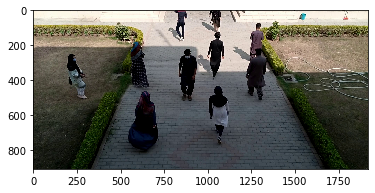

In [12]:
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
# rect = patches.Rectangle((1247, 285), 1319-1247, 285-75, linewidth=1, edgecolor='r', facecolor='none')
# ax.add_patch(rect)
# rect = patches.Rectangle((810, 190), 894-810, 190--21, linewidth=1, edgecolor='r', facecolor='none')
# # Add the patch to the Axes
# ax.add_patch(rect)

plt.show()

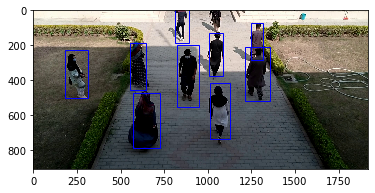

In [11]:
tree = ET.parse('C:/Users/mahir/computer_vision/project/data/Annotations/00003067.xml')
root = tree.getroot()
# im = Image.open('C:/Users/mahir/computer_vision/project/data/Image_frames/00003267.png')
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

for object in root.iter('object'):
    x_min = int(object[5][0].text)
    y_min = int(object[5][1].text)
    x_max = int(object[5][2].text)
    y_max = int(object[5][3].text)
    if object[0].text=='NM':
        rect = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)
    elif object[0].text=='MW':
        rect = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)


plt.show()

In [8]:
list_path = []
list_path_frames = []

In [9]:
for filename in glob(r'C:\Users\mahir\computer_vision\project\data\Annotations\*.xml'):
    list_path.append(filename)
    

In [10]:
for filename in glob(r'C:\Users\mahir\computer_vision\project\data\Image_frames\*.png'):
    list_path_frames.append(filename)

In [11]:
label_frames = {
    'frame': []
}
for path in list_path:
    tree = ET.parse(path)
    root = tree.getroot()
    label_frames['frame'].append(root)

In [12]:
print(len(label_frames['frame']))
print(label_frames['frame'][400][7][0].text)

4357
NM


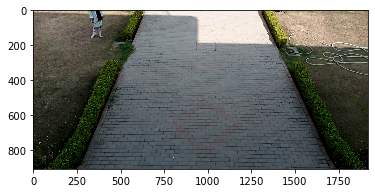

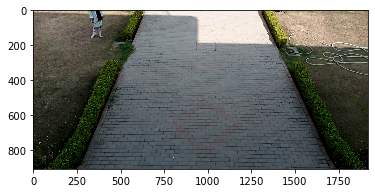

(200, 500)
<class 'PIL.PngImagePlugin.PngImageFile'>


In [13]:
## cropping image test
im = Image.open(list_path_frames[202])
fig, ax = plt.subplots()
ax.imshow(im)
plt.show()

im1 = im.crop((200, 100, 400, 600))
fig, ax = plt.subplots()
ax.imshow(im)
plt.show()

print(im1.size)
print(type(im))

In [14]:

len(label_frames['frame']) -len(label_frames['frame'])%20

4340

# Initializing the dataset splitted in NM and WM

In [15]:
cropped_im_no_mask = []
cropped_im_mask = []
i = 60    #Defines the i-th frames which are used to prevent the dataset from having to much similiar images
ith_frame = int((len(label_frames['frame']) -len(label_frames['frame'])%i)/i)

for frame in range(ith_frame): 
    for object in label_frames['frame'][frame*i].iter('object'):
        x_min = int(object[5][0].text)
        y_min = int(object[5][1].text)
        x_max = int(object[5][2].text)
        y_max = int(object[5][3].text)
        im = Image.open(list_path_frames[frame*i])
        if object[0].text == 'NM':
            img = np.array(im.crop((x_min, y_min, x_max, y_max)))
            img = cv2.resize(img, ( 100, 200))
            cropped_im_no_mask.append(img)
        elif object[0].text == 'MW': 
            img = np.array(im.crop((x_min, y_min, x_max, y_max)))
            img = cv2.resize(img, (100, 200))
            cropped_im_mask.append(img) 

In [16]:
cropped_im_mask = []
for frame in range(ith_frame): 
    for object in label_frames['frame'][frame*i].iter('object'):
        x_min = int(object[5][0].text)
        y_min = int(object[5][1].text)
        x_max = int(object[5][2].text)
        y_max = int(object[5][3].text)
        im = Image.open(list_path_frames[frame*i])
        if object[0].text == 'MW': 
            img = np.array(im.crop((x_min, y_min, x_max, y_max)))
            img = cv2.resize(img, (100, 200))
            cropped_im_mask.append(img)  

Visualizing the data

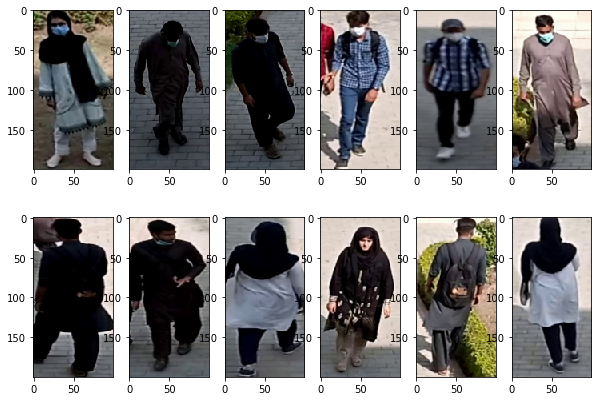

In [27]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 6

fig.add_subplot(rows, columns, 1)
plt.imshow(cropped_im_mask[10])
fig.add_subplot(rows, columns, 2)
plt.imshow(cropped_im_mask[3000])
fig.add_subplot(rows, columns, 3)
plt.imshow(cropped_im_mask[4500])
fig.add_subplot(rows, columns, 4)
plt.imshow(cropped_im_mask[1500])
fig.add_subplot(rows, columns, 5)
plt.imshow(cropped_im_mask[2000])
fig.add_subplot(rows, columns, 6)
plt.imshow(cropped_im_mask[2500])

fig.add_subplot(rows, columns, 7)
plt.imshow(cropped_im_no_mask[10])
fig.add_subplot(rows, columns, 8)
plt.imshow(cropped_im_no_mask[3500])
fig.add_subplot(rows, columns, 9)
plt.imshow(cropped_im_no_mask[1000])
fig.add_subplot(rows, columns, 10)
plt.imshow(cropped_im_no_mask[1500])
fig.add_subplot(rows, columns, 11)
plt.imshow(cropped_im_no_mask[3000])
fig.add_subplot(rows, columns, 12)
plt.imshow(cropped_im_no_mask[2500])

# Storing the data

In [ ]:
#### Storing data
for i in range(len(cropped_im_mask)):
    original = cropped_im_mask[i]
    cv2.imwrite("testset_mask%d.png"%(i+1), original)
    

In [ ]:
#### Storing data
for i in range(len(cropped_im_no_mask)):
    original = cropped_im_no_mask[i]
    cv2.imwrite("testset_no_mask%d.png"%(i+1), original)
    

Splitting train-, and testset

In [63]:
####Splitting train-, and testset####
test_ratio = 0.15

test_padded_cropped_im_no_mask= padded_cropped_im_no_mask[0:int(len(padded_cropped_im_no_mask)*test_ratio)]
train_padded_cropped_im_no_mask= padded_cropped_im_no_mask[int(len(padded_cropped_im_no_mask)*test_ratio):]

test_padded_cropped_im_mask= padded_cropped_im_mask[0:int(len(padded_cropped_im_mask)*test_ratio)]
train_padded_cropped_im_mask= padded_cropped_im_mask[int(len(padded_cropped_im_mask)*test_ratio):]



Storing the splitted data

In [69]:
for i in range(len(test_padded_cropped_im_no_mask)):
    original = test_padded_cropped_im_no_mask[i]
    original.save("testset_no_mask%d.png"%(i+1), format="png")
    

In [70]:
for i in range(len(train_padded_cropped_im_no_mask)):
    original = train_padded_cropped_im_no_mask[i]
    original.save("trainset_no_mask%d.png"%(i+1), format="png")

In [71]:
for i in range(len(train_padded_cropped_im_mask)):
    original = train_padded_cropped_im_mask[i]
    original.save("trainset_mask%d.png"%(i+1), format="png")

In [73]:
for i in range(len(test_padded_cropped_im_mask)):
    original = test_padded_cropped_im_mask[i]
    original.save("testset_mask%d.png"%(i+1), format="png")

# Loading data for further data augmentation

In [30]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))  #scaling 
        if img is not None:
            images.append(img)
    return images

In [31]:
pathlib.Path().absolute()

WindowsPath('C:/Users/mahir/computer_vision/project')

In [32]:
path_train_facemask = 'C:/Users/mahir/computer_vision/project/20th_framesset/train/mask'
path_train_no_facemask = 'C:/Users/mahir/computer_vision/project/20th_framesset/train/no_mask'    
train_mask = load_images_from_folder(path_train_facemask)    
train_no_mask  =load_images_from_folder(path_train_no_facemask)      
path_test_no_facemask = 'C:/Users/mahir/computer_vision/project/20th_framesset/test/no_mask'
path_test_facemask = 'C:/Users/mahir/computer_vision/project/20th_framesset/test/mask'    
test_no_mask = load_images_from_folder(path_test_no_facemask)
test_mask = load_images_from_folder(path_test_facemask)


 Mirroring the dataset verticaly 
 

In [47]:
flip_train_mask = np.flip(train_mask, axis=3)
flip_train_no_mask = np.flip(train_no_mask, axis=3)
flip_test_mask = np.flip(test_mask, axis=3)
flip_test_no_mask = np.flip(test_no_mask, axis=3)

In [47]:
print(len(cropped_im_no_mask))
print(len(cropped_im_mask))
print(np.array(cropped_im_no_mask).shape)

220
137
(220, 200, 100, 3)


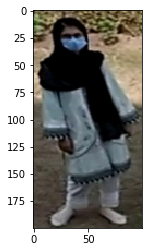

In [23]:
plt.imshow(np.array(cropped_im_mask)[2])
plt.imshow(np.array(cropped_im_mask)[2])


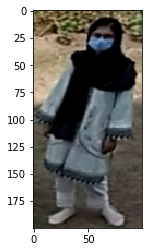

In [26]:
plt.imshow(np.flip(np.array(cropped_im_mask),2)[2])

In [29]:
flipped_mask = np.flip(np.array(cropped_im_mask),2)
flipped_no_mask = np.flip(np.array(cropped_im_no_mask),2)

In [54]:
test_no_mask = np.array(cropped_im_no_mask)[193:]
train_no_mask = np.array(cropped_im_no_mask)[:110]
test_mask = np.array(cropped_im_mask)[110:]
train_mask = np.array(cropped_im_mask)[:110]

In [57]:
# for i in range(len(train_mask)):
#     original = train_mask[i]
#     cv2.imwrite("train_mask%d.png"%(i+1), original)

# for i in range(len(test_mask)):
#     original = test_mask[i]
#     cv2.imwrite("test_mask%d.png"%(i+1), original)
# for i in range(len(train_no_mask)):
#     original = train_no_mask[i]
#     cv2.imwrite("train_no_mask%d.png"%(i+1), original)
for i in range(len(test_no_mask)):
    original = test_no_mask[i]
    cv2.imwrite("test_no_mask%d.png"%(i+1), original)   

In [49]:
train_aug_mask = flipped_mask[:110] 
train_aug_mask = np.append(train_aug_mask, np.array(cropped_im_mask)[:110], axis=0)
print(train_aug_mask.shape)
test_aug_mask = flipped_mask[110:] 
test_aug_mask = np.append(test_aug_mask, np.array(cropped_im_mask)[110:], axis=0)
print(test_aug_mask.shape)

train_aug_no_mask = flipped_no_mask[:110] 
train_aug_no_mask = np.append(train_aug_no_mask, np.array(cropped_im_no_mask)[:110], axis=0)
print(train_aug_no_mask.shape)

test_aug_no_mask = flipped_no_mask[193:] 
test_aug_no_mask = np.append(test_aug_no_mask, np.array(cropped_im_no_mask)[193:], axis=0)
print(test_aug_no_mask.shape)


(220, 200, 100, 3)
(54, 200, 100, 3)
(220, 200, 100, 3)
(54, 200, 100, 3)


In [50]:
# for i in range(len(train_aug_mask)):
#     original = train_aug_mask[i]
#     cv2.imwrite("train_aug_mask%d.png"%(i+1), original)

# for i in range(len(test_aug_mask)):
#     original = test_aug_mask[i]
#     cv2.imwrite("test_aug_mask%d.png"%(i+1), original)
# for i in range(len(train_aug_no_mask)):
#     original = train_aug_no_mask[i]
#     cv2.imwrite("train_aug_no_mask%d.png"%(i+1), original)
for i in range(len(test_aug_no_mask)):
    original = test_aug_no_mask[i]
    cv2.imwrite("test_aug_no_mask%d.png"%(i+1), original)    

In [80]:
for i in range(len(flip_train_mask)):
    original = flip_train_mask[i]
    cv2.imwrite("flip_train_mask%d.png"%(i+1), original)
# for i in range(len(flip_train_no_mask)):
#     original = flip_train_no_mask[i]
#     cv2.imwrite("flip_train_no_mask%d.png"%(i+1), original)
# for i in range(len(flip_test_mask)):
#     original = flip_test_mask[i]
#     cv2.imwrite("flip_test_mask%d.png"%(i+1), original)
# for i in range(len(flip_test_no_mask)):
#     original = flip_test_no_mask[i]
#     cv2.imwrite("flip_test_no_mask%d.png"%(i+1), original)

In [79]:
####Splitting train-, and testset####
padded_cropped_im_mask = mask
padded_cropped_im_no_mask = no_mask

test_ratio = 0.15

test_padded_cropped_im_no_mask= padded_cropped_im_no_mask[0:int(len(padded_cropped_im_no_mask)*test_ratio)]
train_padded_cropped_im_no_mask= padded_cropped_im_no_mask[int(len(padded_cropped_im_no_mask)*test_ratio):]

test_padded_cropped_im_mask= padded_cropped_im_mask[0:int(len(padded_cropped_im_mask)*test_ratio)]
train_padded_cropped_im_mask= padded_cropped_im_mask[int(len(padded_cropped_im_mask)*test_ratio):]


    

NameError: name 'mask' is not defined

In [15]:
for i in range(len(test_padded_cropped_im_no_mask)):
    original = test_padded_cropped_im_no_mask[i]
    cv2.imwrite("C:/Users/mahir/computer_vision/project/reduced_split_set/test/no_mask/testset_no_mask%d.png"%(i+1), original)
for i in range(len(train_padded_cropped_im_no_mask)):
    original = train_padded_cropped_im_no_mask[i]
    cv2.imwrite("C:/Users/mahir/computer_vision/project/reduced_split_set/train/no_mask/trainset_no_mask%d.png"%(i+1), original)
for i in range(len(train_padded_cropped_im_mask)):
    original = train_padded_cropped_im_mask[i]
    cv2.imwrite("C:/Users/mahir/computer_vision/project/reduced_split_set/train/mask/trainset_mask%d.png"%(i+1), original)
for i in range(len(test_padded_cropped_im_mask)):
    original = test_padded_cropped_im_mask[i]
    cv2.imwrite("C:/Users/mahir/computer_vision/project/reduced_split_set/test/no_mask/testset_mask%d.png"%(i+1), original)    

In [64]:
# ####Storing datasets####

# with open("testset_mask.txt", "wb") as fp:
#     pickle.dump(test_padded_cropped_im_no_mask, fp)
    
# with open("trainset_mask.txt", "wb") as fp:
#     pickle.dump(train_padded_cropped_im_no_mask, fp)   
    
# with open("testset_no_mask.txt", "wb") as fp:
#     pickle.dump(test_padded_cropped_im_mask, fp) 
    
# with open("trainset_no_mask.txt", "wb") as fp:
#     pickle.dump(train_padded_cropped_im_mask, fp)    

In [74]:
# with open("testset_mask.txt", "rb") as fp:
#     testset_mask = pickle.load(fp)
# with open("trainset_mask.txt", "rb") as fp:
#     train_mask = pickle.load(fp)    
# with open("testset_no_mask.txt", "rb") as fp:
#     testset_no_mask = pickle.load(fp)
# with open("trainset_no_mask.txt", "rb") as fp:
#     train_no_mask = pickle.load(fp)        
    